In [4]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

# set month for covid reference line
covid = ("2022-03-01")

# set position for covid text
pos_text_covid = ("2022-02-01")

# set month for chart labels
pos_chart_labels = ("2022-09-01")

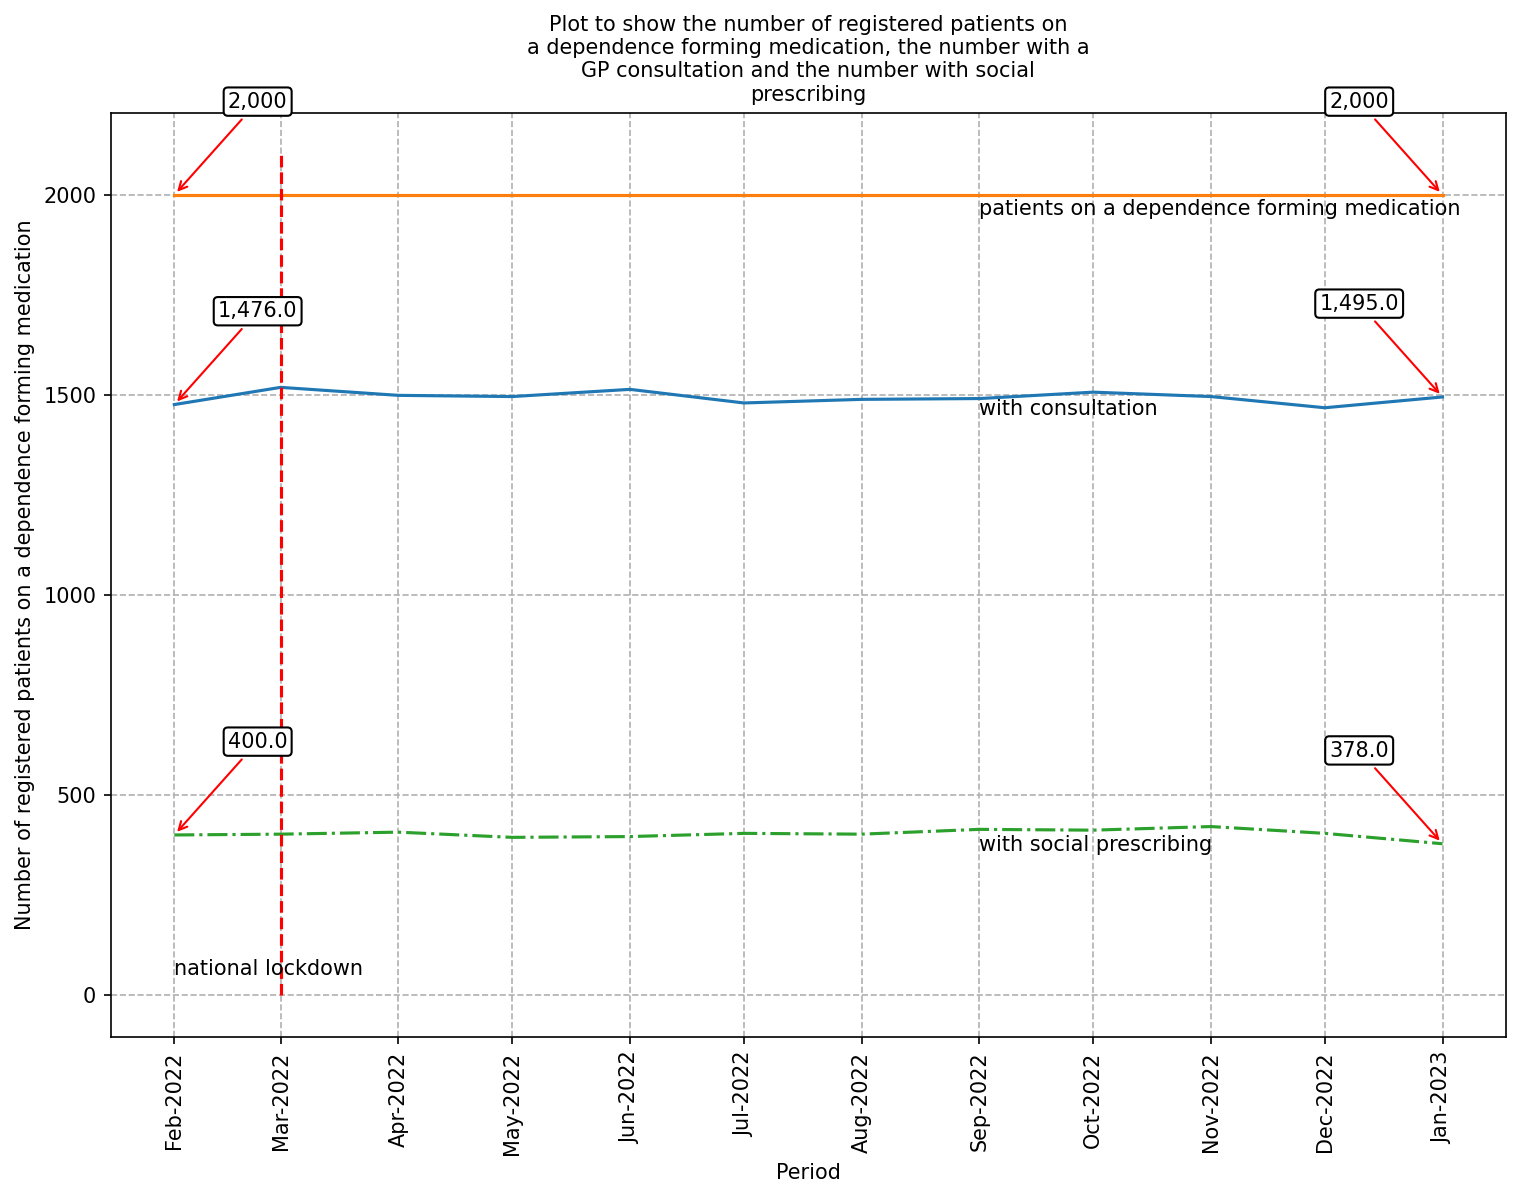

In [5]:
data_consult=pd.read_csv("output/measure_gp_consultation_rate.csv", usecols=["date", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_socialrx=pd.read_csv("output/measure_social_prescribing_rate.csv", usecols=["date", "with_social_prescribing", "population", "research_population"], parse_dates=["date"])
df_consult=data_consult.loc[data_consult["research_population"] == 1, :]
df_socialrx=data_socialrx.loc[data_socialrx["research_population"] == 1, :]
x=df_consult["date"]
y1=df_consult["with_consultation"]
y2=df_consult["population"]
y3=df_socialrx["with_social_prescribing"]
plt.figure(figsize=(12,8), dpi=150)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3, '-.')
plt.ylabel('Number of registered patients on a dependence forming medication')
plt.xlabel('Period')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=2100,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.annotate('national lockdown', xy =(covid, 50),
                xytext =(pos_text_covid, 50))
plt.annotate(f"{y1.iloc[0]:,}", xy=(x.iloc[0], y1.iloc[0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))
plt.annotate(f"{y1.iloc[-1]:,}", xy=(x.iloc[-1], y1.iloc[-1]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))
plt.annotate(f"{y2.iloc[0]:,}", xy=(x.iloc[0], y2.iloc[0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))
plt.annotate(f"{y2.iloc[-1]:,}", xy=(x.iloc[-1], y2.iloc[-1]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))
plt.annotate(f"{y3.iloc[0]:,}", xy=(x.iloc[0], y3.iloc[0]), xytext=(40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', 
                            color='red'))
plt.annotate(f"{y3.iloc[-1]:,}", xy=(x.iloc[-1], y3.iloc[-1]), xytext=(-40,40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0', 
                            color='red'))
plt.annotate('patients on a dependence forming medication', xy =(pos_chart_labels, 2000),
                xytext =(pos_chart_labels, 1950),)
plt.annotate('with consultation', xy =(pos_chart_labels, 2000),
                xytext =(pos_chart_labels, 1450),)
plt.annotate('with social prescribing', xy =(pos_chart_labels, 2000),
                xytext =(pos_chart_labels, 360),)
title = 'Plot to show the number of registered patients on a dependence forming medication, the number with a GP consultation and the number with social prescribing'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig('output/measure_gp_consultation_rate_plot.png', bbox_inches='tight', dpi=150)
plt.show()

In [6]:
%cd C:\Users\rachel.seeley\Documents\GitHub\dfms-covid19


C:\Users\rachel.seeley\Documents\GitHub\dfms-covid19
